In [39]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [40]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 440.0     # sine frequency, Hz # 440 = 라(A), 880 = 

In [41]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [42]:
# generate phase(각도)
theta = t * 2*np.pi * freq

In [43]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)

<IPython.core.display.Javascript object>


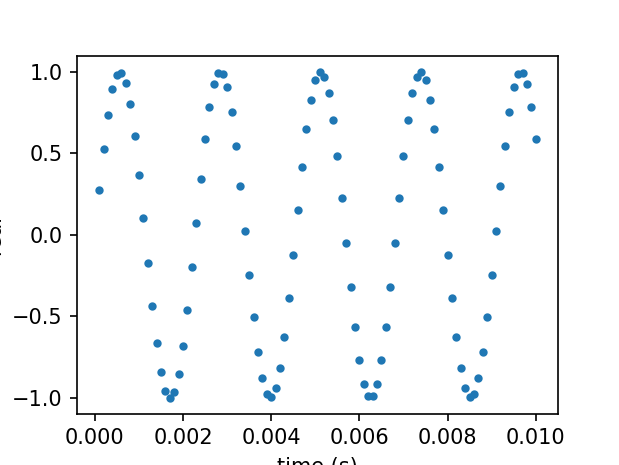

Text(0, 0.5, 'real')

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [21]:
ipd.Audio(s, rate=sr)

In [46]:
#cos에서 2분의 파이(90도) 만큼 이동하면 sin, if 8분의 파이 만큼 이동했다면? 소리는 달라지지 않음
#우리의 귀는 phase의 shift를 식별하지 못함, frequency에 대한 sensitivity 가지고 있음

In [48]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

<IPython.core.display.Javascript object>


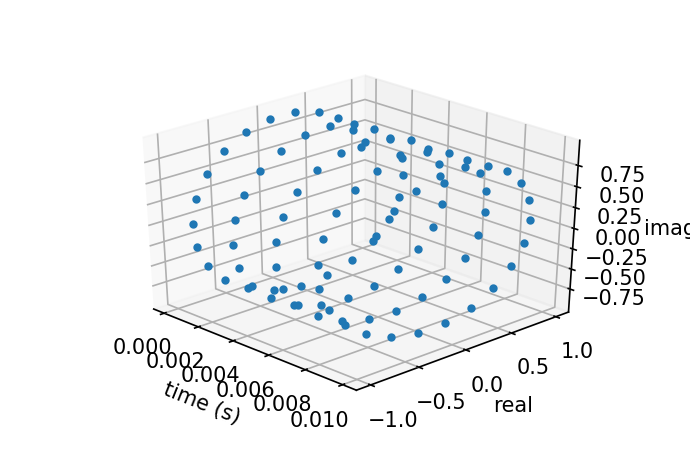

Text(0.5, 0, 'imag')

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [50]:
ipd.Audio(c.real, rate=sr) # c.real : real값만 들음

Generate pulse train

<IPython.core.display.Javascript object>


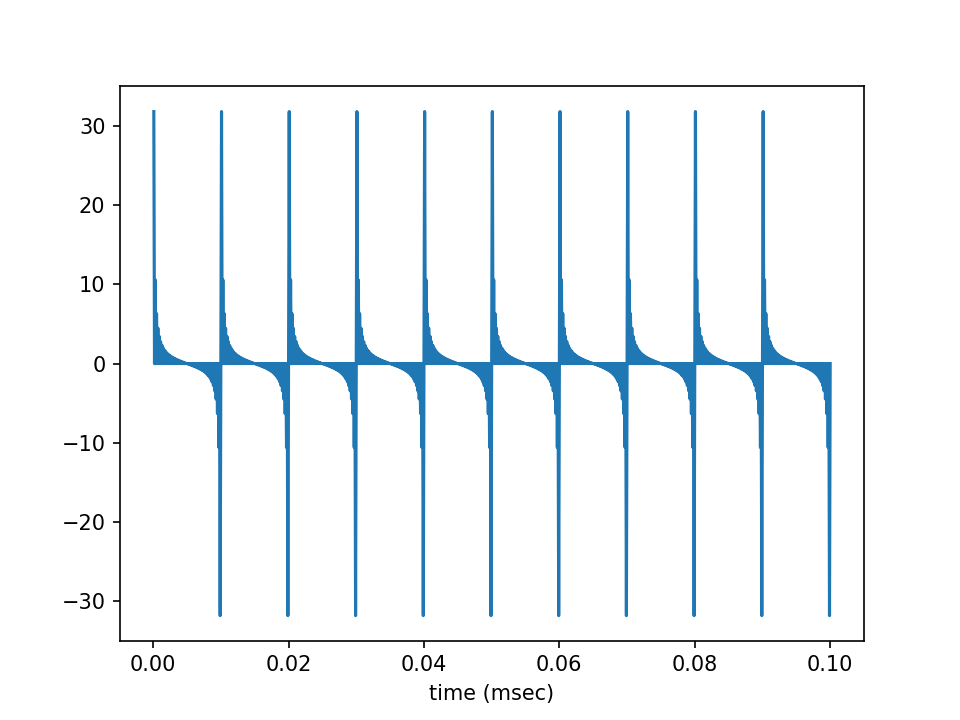

In [51]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr) #이 그림은 waveform, 스펙트럼이 아님

In [52]:
#function을 만드는 방법, 우리가 쓰던 만들어져 있던 function들 이렇게 만들어짐
def hz2w(F, sr): #입력 2개
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w #return : 출력

def resonance (srate, F, BW): #입력 3개
    a2 = np.exp(-hz2w(BW,srate)) #hz2w가 이미 resonance안에 내부적으로 들어있으므로 resonance만 쓰면 됨
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [53]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator #BWG : 산맥의 shape을 결정, 뚱뚱하냐 뾰족하냐
#frequency 0의 자리에 width100의 뚱뚱한 산맥을 만들어라!
a, b=resonance(sr,RG,BWG) 
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [54]:
RG = 500  # RG is the frequency of the Glottal Resonator #first formant(첫번째 산맥)를 500에서 만듦, 60의 width로
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [55]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [56]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [58]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [59]:
#입술이 없다면 위에서 끝
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)